In [11]:
import pickle
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [12]:
os.chdir('/home/tka/source/')

In [13]:
processed_data = pickle.load(open('processedmap.pickle', 'rb'))

In [14]:
rgb_matrix = np.zeros(shape=(180, 181, 3))

In [15]:
class WaveModel:

    def __init__(self, _modelfile=''):
        '''
        WaveModel.init(_modelfile='') - Initalizes the WaveModel class and loads in a modelfile.
        '''
        self.modelfile = np.loadtxt('/home/tka/source/wenqi/tiAlphaProcessed_wavespeeds.csv',
                        delimiter=',')
        self.planes = self.modelfile[:, 1:3]
        self.modelfile = self.modelfile[:,3:184] * 1000.0

    def compute_gaussian(self, _x, _mean, _width):
        return (1 / np.sqrt(2*np.pi*(_width**2)))*np.exp((-(_x-_mean)**2)/(2*(_width**2)))

In [16]:
test_wm = WaveModel('')

In [18]:
npmapresults = processed_data
normalmap = np.zeros(shape=(181,180,3))
rotationmap = np.zeros(shape=(181,180))
for z in range(0, 2):
    for row in range(0, 179):
        for col in range(0, 180):
            _plane = int(npmapresults[row,col,0])
            normalmap[row,col,z] = test_wm.planes[_plane][z]

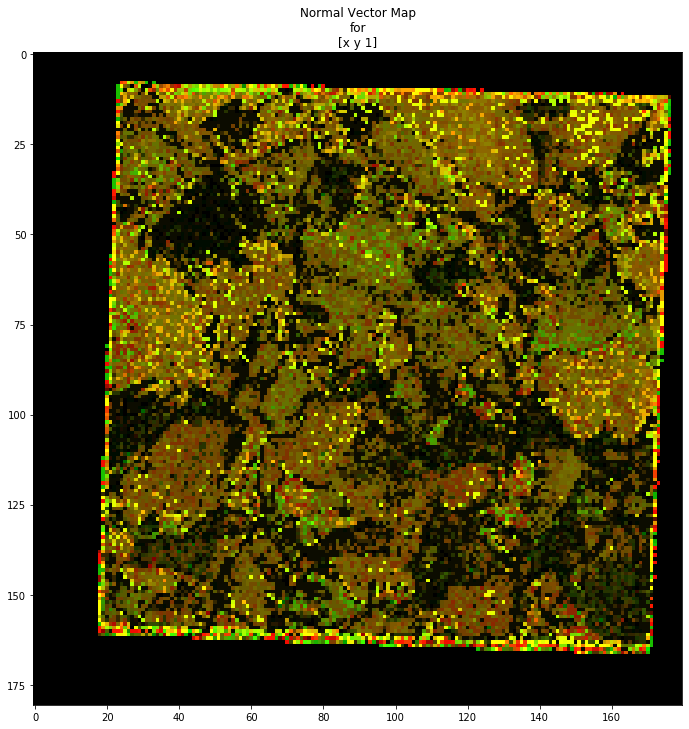

In [42]:
plt.figure(figsize=[12,12])
plt.title('Normal Vector Map\nfor\n[x y 1]')
plt.imshow(normalmap[:,:])

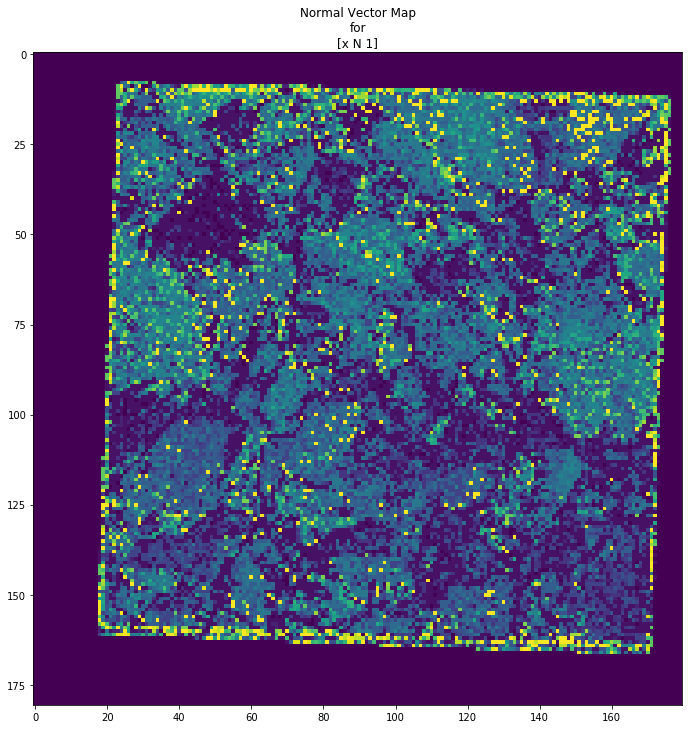

In [48]:
plt.figure(figsize=[12,12])
plt.title('Normal Vector Map\nfor\n[x N 1]')
plt.imshow(normalmap[:,:,1])

Text(0, 0.5, 'Y-axis [0.1 mm/ps]')

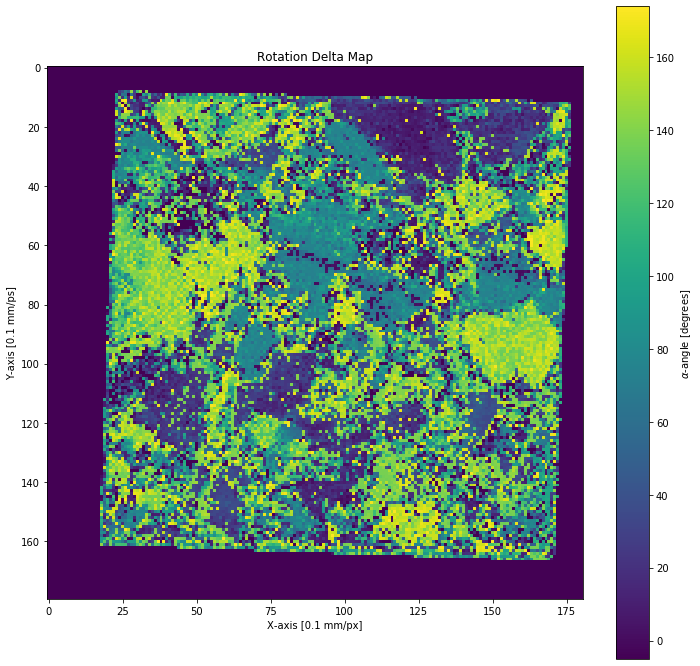

In [28]:
plt.figure(figsize=[12,12])
plt.imshow(npmapresults[:,:,1])
plt.title("Rotation Delta Map")
rotbar = plt.colorbar()
rotbar.set_label(r'$\alpha$-angle [degrees]')
plt.xlabel(r'X-axis [0.1 mm/px]')
plt.ylabel(r'Y-axis [0.1 mm/ps]')

In [43]:
import pandas as pd
x_vectors = pd.DataFrame(normalmap[:,:,0])
y_vectors = pd.DataFrame(normalmap[:,:,1])
rot_angles = pd.DataFrame(processed_data[:,:,1])

In [44]:
x_vectors.to_csv('/home/tka/source/testsample_xvecs.csv')
y_vectors.to_csv('/home/tka/source/testsample_yvecs.csv')
rot_angles.to_csv('/home/tka/source/testsample_rotations.csv')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0, 0.5, 'Stepover Axis [1 px = 0.1mm]')

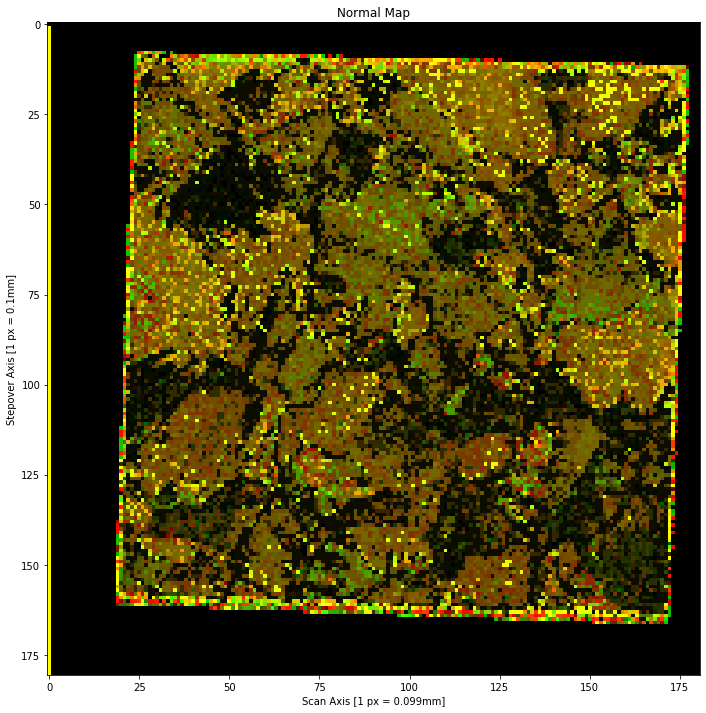

In [46]:
import numpy as np
import matplotlib.pyplot as plt
xvecs = pd.read_csv('/path/to/testsample_xvecs.csv')
yvecs = pd.read_csv('C:\\windows\\path\\to\\testsample_yvecs.csv')
combinedarray = np.zeros(shape=(181,181,3))
combinedarray[:,:,0] = xvecs
combinedarray[:,:,1] = yvecs
plt.figure(figsize=[12, 12])
plt.imshow(combinedarray)
plt.title('Normal Map')
plt.xlabel('Scan Axis [1 px = 0.099mm]')
plt.ylabel('Stepover Axis [1 px = 0.1mm]')